# **Projet Deep Learning et vision par ordinateur : Cat and Dog**

# Importation des dépendances

In [1]:
import tensorflow as tf
import os, shutil
from keras.layers import Input, Flatten, Dense
from keras.layers import Convolution2D as Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.models import Sequential, Model
from keras.optimizers import Adam, RMSprop
from keras.utils import to_categorical
from keras.datasets import cifar10, mnist
import numpy as np 
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

# Préparation des données

## Importation et organisation des données (Version Google Collab)

**Idée 1** : pour labelliser les images on crée une liste labels avec des 0 ou des 1 en fonction du nom du fichier. 

**Idée 2** : On les met dans des répertoires différents : 1 pour les chats et 1 pour les chiens. On crée donc un dataset plus petit 'cats_and_dogs_small', dans lequel on retrouve un répertoire 'train', 'test' et 'validation'. Dans chacun de ces répertoires on retrouve les répertoires 'cats' et 'dogs'. 

On se servira de 2000 images pour l'apprentissage (1000 chats et 1000 chiens), 1000 images pour le test (500 et 500) et 1000 images pour la validation.

In [2]:
# Accéder au drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Dézipper la base de données 
from zipfile import ZipFile

test_file_name = "/content/drive/MyDrive/data.zip"

with ZipFile(test_file_name, 'r') as zip:
    zip.printdir()
    zip.extractall('data_cat_dog') 


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
data/cat.183.jpg                               2013-09-20 10:07:36         2530
__MACOSX/data/._cat.183.jpg                    2013-09-20 10:07:36          212
data/cat.2677.jpg                              2013-09-20 10:08:06        15111
__MACOSX/data/._cat.2677.jpg                   2013-09-20 10:08:06          212
data/cat.6411.jpg                              2013-09-20 10:10:16        15271
__MACOSX/data/._cat.6411.jpg                   2013-09-20 10:10:16          212
data/dog.4744.jpg                              2013-09-20 10:02:26        37701
__MACOSX/data/._dog.4744.jpg                   2013-09-20 10:02:26          212
data/cat.9722.jpg                              2013-09-20 10:12:14        33848
__MACOSX/data/._cat.9722.jpg                   2013-09-20 10:12:14          212
data/dog.10373.jpg                             2013-09-20 09:58:54        20306
__MACOSX/data/._dog.10373.jpg             

In [4]:
# Création du petit dataset 

# Répertoire original
original_dataset_dir = '/content/data_cat_dog/data'

# Répertoire où on stocke notre petit dataset
base_dir = '/content/data_cat_dog/cats_and_dogs_small'
os.mkdir(base_dir)

# Répertoires pour le training, validation, test split
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Répertoire pour le train avec les cats
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Répertoire pour le train avec les dogs
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Répertoire pour le validation avec les cats
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Répertoire pour le validation avec les dogs
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Répertoire pour le test avec les cats
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Répertoire pour le test avec les dogs
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Copier les 1000 images de cats dans train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copier les 500 autres images de cats to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copier les 500 autres images de cats to tests_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copier les 1000 images de dogs dans train_cats_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copier les 500 autres images de dogs to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copier les 500 autres images de dogs to tests_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

## Exploration des données 

Dans chaque répertoire, il y a le même nombre d'échantillons de chaque classe : il s'agit d'un problème de classification binaire équilibrée.

In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


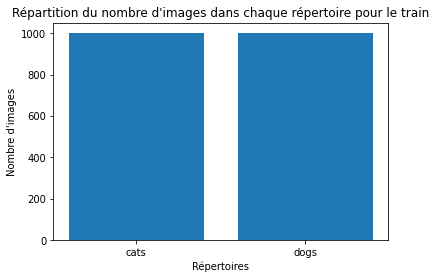

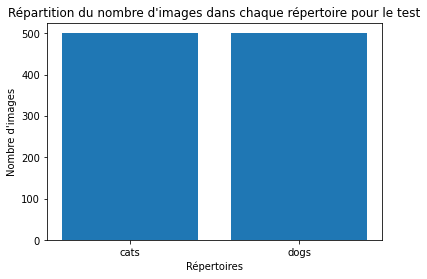

In [ ]:
# Créer une liste des noms de répertoires
directories = ['cats', 'dogs']

# Fonction pour compter le nombre de fichiers dans chaque répertoire
def count_files(directory):
    return len([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])

# Créer une liste de nombres de fichiers pour chaque répertoire
train_counts = [count_files(os.path.join(train_dir, d)) for d in directories]

# Créer un graphique en barres pour afficher les nombres de fichiers pour le train
plt.bar(directories, train_counts)
plt.xlabel('Répertoires')
plt.ylabel('Nombre d\'images')
plt.title('Répartition du nombre d\'images dans chaque répertoire pour le train')
plt.show()
# Créer une liste de nombres de fichiers pour chaque répertoire
test_counts = [count_files(os.path.join(test_dir, d)) for d in directories]

# Créer un graphique en barres pour afficher les nombres de fichiers pour le test
plt.bar(directories, test_counts)
plt.xlabel('Répertoires')
plt.ylabel('Nombre d\'images')
plt.title('Répartition du nombre d\'images dans chaque répertoire pour le test')
plt.show()

# **Essai 1 : CNN simple**

## Pré-traitement des données 

In [ ]:
# Redimensionner les valeurs des pixels (entre 0 et 255) à l'intervalle [0, 1] 
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
        train_dir, # target directory
        target_size=(64, 64), # images will be resized to 64x64
        batch_size=20, # batches of 20
        class_mode='binary' # we use binary_crossentropy loss, we need binary labels
)

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # target directory
        target_size=(64, 64), # images will be resized to 150x150
        batch_size=20, # batches of 20
        class_mode='binary') # we use binary_crossentropy loss, we need binary labels

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 64, 64, 3)
labels batch shape: (20,)


La taille de data_batch est (20, 64, 64, 3) : chaque lot de données train contient 20 images de 64 x 64 pixels avec 3 canaux de couleur (rouge, vert, bleu).
La taille de labels_batch est (20) : chaque lot d'étiquettes correspondant aux données de formation contient 20 étiquettes


## Construction du réseau de neurones

In [ ]:
model = Sequential ()
model.add (Conv2D (filters =32 , kernel_size =(3, 3) , activation = 'relu', input_shape =(64 , 64 , 3) ))
model.add (MaxPooling2D ((2 , 2) ))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add (Flatten () )
model.add (Dense (units =512 , activation = 'relu'))
model.add (Dense (units =1 , activation = 'sigmoid'))

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 6, 6, 128)       

## Définition du modèle d'apprentissage

In [ ]:
history = model.fit(
      train_generator, # générateur Python qui produira des lots d'entrées et de cibles indéfiniment
      steps_per_epoch=100, # nb d'échantillons par lot qu'on tire du générateur avant de déclarer une itération terminée
      epochs=15, # 100 lots de 20 pour atteindre notre objectif de 2000 échantillons
      validation_data=validation_generator, # générateur qui produra des lots de données de validation à l'infini
      validation_steps=50) # 50 lots de 20 pour atteindre notre objectif de 1000 échantillons

Epoch 1/15
100/100 [==============================] - 31s 296ms/step - loss: 0.6954 - accuracy: 0.5240 - val_loss: 0.6915 - val_accuracy: 0.5140
Epoch 2/15
100/100 [==============================] - 29s 292ms/step - loss: 0.6905 - accuracy: 0.5285 - val_loss: 0.6818 - val_accuracy: 0.5700
Epoch 3/15
100/100 [==============================] - 33s 331ms/step - loss: 0.6691 - accuracy: 0.5845 - val_loss: 0.6814 - val_accuracy: 0.5360
Epoch 4/15
100/100 [==============================] - 29s 288ms/step - loss: 0.6638 - accuracy: 0.6095 - val_loss: 0.6728 - val_accuracy: 0.5770
Epoch 5/15
100/100 [==============================] - 32s 321ms/step - loss: 0.6344 - accuracy: 0.6540 - val_loss: 0.6378 - val_accuracy: 0.6360
Epoch 6/15
100/100 [==============================] - 30s 297ms/step - loss: 0.5930 - accuracy: 0.6970 - val_loss: 0.6702 - val_accuracy: 0.6380
Epoch 7/15
100/100 [==============================] - 37s 370ms/step - loss: 0.5333 - accuracy: 0.7335 - val_loss: 0.5959 - val_ac

In [ ]:
model.save('cats_and_dogs_small_1_v3.h5')

## Visualisation de l'évolution de l'apprentissage (fonction coût et accuracy)

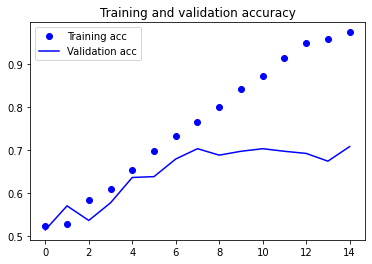

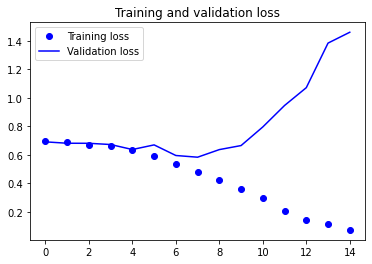

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

On se rend vite compte qu'on a de l'overfit au bout de 8 épochs. On va faire de l'augmentation de données pour résoudre ce problème.

Overfit/Suraprentissage : dû au fait que nous avons trop peu d'échantillons pour en tirer des enseignements, ce qui nous empêche de former un modèle capable de généraliser avec des nouvelles données.

## Classification sur le set Test

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(64, 64),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('Accuracy score du jeu de données test : {:.2f}%'.format(test_acc*100))

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 5s 96ms/step - loss: 1.4578 - accuracy: 0.7050
Accuracy score du jeu de données test : 70.50%


# **Essai 2 : Utilisation de l'augmentation des données**

Augmentation des données : consiste à générer davantage de données d'apprentissage à partir d'échantillons de données d'apprentissage existantes, en "augmentant" les échantillons par un certain nombre de transformations aléatoires qui donnent des images d'apparence crédible. L'objectif est qu'au moment de l'apprentissage, notre modèle ne voit jamais deux fois exactement la même image.  

## Pré-traitement des données

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1.0/255,
      rotation_range=40, # valeur en degrés (0-180), plage à l'intérieur de laquelle on peut faire tourner les images de maniere random
      width_shift_range=0.2, # plage (en fraction de la largeur) à l'intérieur de laquelle il est possible de déplacer aléatoirement des images horizontalement.
      height_shift_range=0.2, # plage (en fraction de la hauteur) à l'intérieur de laquelle il est possible de déplacer aléatoirement des images verticalement.
      shear_range=0.2, # plage permettant d'appliquer de manière aléatoire des transformations de cisaillement
      zoom_range=0.2, # zoomer de manière aléatoire à l'intérieur des images
      horizontal_flip=True, # retourner de manière aléatoire la moitié des images horizontalement -- pertinent lorsqu'il n'y a pas d'hypothèse d'asymétrie horizontale
      fill_mode='nearest') # stratégie utilisée pour remplir les pixels nouvellement créés

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(64, 64), 
        batch_size=20, 
        class_mode='binary' 
)

validation_generator = test_datagen.flow_from_directory(
        validation_dir, 
        target_size=(64, 64), 
        batch_size=20, 
        class_mode='binary') #

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Construction du réseau de neurones

In [ ]:
model = Sequential ()
model.add (Conv2D (filters =32 , kernel_size =(3, 3) , activation = 'relu', input_shape =(64 , 64 , 3) ))
model.add (MaxPooling2D ((2 , 2) ))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add (Flatten () )
model.add (Dense (units =512 , activation = 'relu'))
model.add (Dense (units =1 , activation = 'sigmoid'))

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
# model.summary()

## Définition du modèle d'apprentissage

In [ ]:
history = model.fit(
      train_generator, 
      steps_per_epoch=100, 
      epochs=100, 
      validation_data=validation_generator, 
      validation_steps=50) 

Epoch 1/100
100/100 [==============================] - 37s 362ms/step - loss: 0.6959 - accuracy: 0.4990 - val_loss: 0.6925 - val_accuracy: 0.5930
Epoch 2/100
100/100 [==============================] - 35s 350ms/step - loss: 0.6925 - accuracy: 0.5275 - val_loss: 0.6902 - val_accuracy: 0.5330
Epoch 3/100
100/100 [==============================] - 36s 363ms/step - loss: 0.6889 - accuracy: 0.5405 - val_loss: 0.6951 - val_accuracy: 0.5370
Epoch 4/100
100/100 [==============================] - 32s 320ms/step - loss: 0.6812 - accuracy: 0.5800 - val_loss: 0.6876 - val_accuracy: 0.5430
Epoch 5/100
100/100 [==============================] - 32s 318ms/step - loss: 0.6841 - accuracy: 0.5490 - val_loss: 0.6754 - val_accuracy: 0.5640
Epoch 6/100
100/100 [==============================] - 33s 328ms/step - loss: 0.6750 - accuracy: 0.5910 - val_loss: 0.6777 - val_accuracy: 0.5590
Epoch 7/100
100/100 [==============================] - 44s 441ms/step - loss: 0.6809 - accuracy: 0.5685 - val_loss: 0.6605 -

In [ ]:
model.save('cats_and_dogs_small_2_v3.h5')

## Visualisation de l'évolution de l'apprentissage

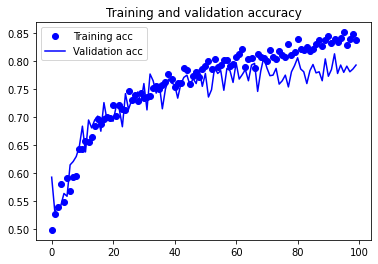

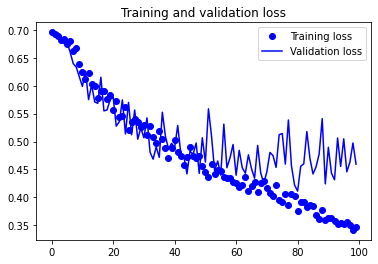

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

On n'a plus d'overfitting

## Classification sur le set Test

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(64, 64),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('Accuracy score du jeu de données test : {:.2f}%'.format(test_acc*100))

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 5s 95ms/step - loss: 0.5193 - accuracy: 0.8050
Accuracy score du jeu de données test : 80.50%


# **Essai 3 : Transfert Learning par Fine-tuning**

Objectif du TP :
- se familiariser avec l’architecture d’un réseau de convolution de taille significative : VGG16 
- l'utiliser pour une autre tâche de reconnaissance (C'est ce qu'on appelle le transfert learning)

Le réseau de convolution VGG16 est un modèle de classification appris sur la base d’images ImageNet, contenant plus d’un million d’images réparties en 1000 classes. Son architecture est composée de cinq blocs chacun constitué de :
- deux ou trois couches de convolution avec les même dimensions spatiales 
- une couche de pooling divisant les dimensions spatiales par deux
Ensuite le nombre de feature maps est doublé à la couche suivante. La fin du réseau comporte trois couches fully connected.

⚠️ Attention : l'apprentissage de nouveau réseau nécessite plusieurs heures !

## Pré-traitement des données

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1.0/255,
      rotation_range=40, 
      width_shift_range=0.2, 
      height_shift_range=0.2, 
      shear_range=0.2, 
      zoom_range=0.2, 
      horizontal_flip=True, 
      fill_mode='nearest') 

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(64, 64), 
        batch_size=20, 
        class_mode='binary' 
)

validation_generator = test_datagen.flow_from_directory(
        validation_dir, 
        target_size=(64, 64), 
        batch_size=20, 
        class_mode='binary') 

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Construction du réseau de neurones par transfert learning

In [ ]:
from keras.applications import VGG16
from keras.optimizers import RMSprop

In [ ]:
conv_base = VGG16(weights='imagenet', # point de contrôle des poids à partir duquel le modèle doit être initialisé
                  include_top=False, # l'inclusion ou non du classificateur densément connecté au sommet du réseau
                  # Puisque nous avons l'intention d'utiliser notre propre classificateur à connexion dense (avec seulement deux classes, chat et chien), nous n'avons pas besoin de l'inclure.
                  input_shape=(64, 64, 3))

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=2e-5), metrics=['accuracy'])

Le code ci-dessus permet de construire notre réseau de neurones, qui est composé de conv_base (donc VGG16) + une couche de flatten et deux dense

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               524544    
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 15,239,489
Trainable params: 15,239,489
Non-trainable params: 0
_________________________________________________________________


Le réseau VGG16 utilise 14 714 688 paramètres

## Fine-tuning

Fine-Tuning consiste à dégeler quelques couches supérieures d'une base de modèle gelée utilisée pour l'extraction de caractéristiques, et former conjointement la partie nouvellement ajoutée du modèle (dans notre cas, le classificateur entièrement connecté) et ces couches supérieures. C'est ce qu'on appelle le "réglage fin", car il permet d'ajuster légèrement des représentations du modèle réutilisées, afin de les rendre plus pertinentes pour le problème à résoudre.

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

## Définition du modèle d'apprentissage

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/20
100/100 [==============================] - 16s 143ms/step - loss: 0.5815 - accuracy: 0.6850 - val_loss: 0.3927 - val_accuracy: 0.8180
Epoch 2/20
100/100 [==============================] - 12s 125ms/step - loss: 0.4559 - accuracy: 0.7785 - val_loss: 0.3811 - val_accuracy: 0.8240
Epoch 3/20
100/100 [==============================] - 12s 124ms/step - loss: 0.4136 - accuracy: 0.8100 - val_loss: 0.4339 - val_accuracy: 0.7940
Epoch 4/20
100/100 [==============================] - 13s 135ms/step - loss: 0.3853 - accuracy: 0.8230 - val_loss: 0.3108 - val_accuracy: 0.8620
Epoch 5/20
100/100 [==============================] - 12s 119ms/step - loss: 0.3632 - accuracy: 0.8330 - val_loss: 0.3315 - val_accuracy: 0.8530
Epoch 6/20
100/100 [==============================] - 12s 123ms/step - loss: 0.3209 - accuracy: 0.8585 - val_loss: 0.3232 - val_accuracy: 0.8620
Epoch 7/20
100/100 [==============================] - 12s 124ms/step - loss: 0.3173 - accuracy: 0.8660 - val_loss: 0.2754 - val_ac

In [ ]:
model.save('cats_and_dogs_small_3_v3.h5')

## Visualisation de l'évolution de l'apprentissage

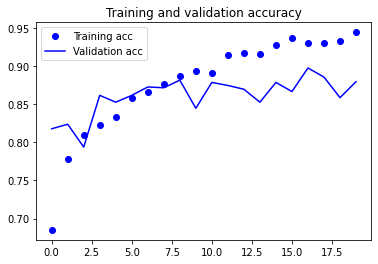

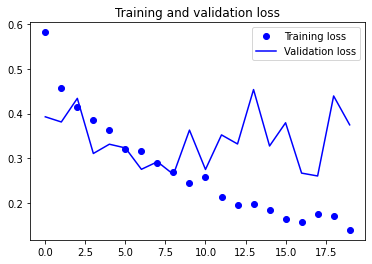

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Classification sur le set Test

In [5]:
from tensorflow.keras.models import load_model
model = load_model ('cats_and_dogs_small_3_v3.h5')

In [8]:
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(64, 64),
        batch_size=20,
        class_mode='binary',
        shuffle = False)

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('Accuracy score du jeu de données test : {:.2f}%'.format(test_acc*100))

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 39s 714ms/step - loss: 0.4239 - accuracy: 0.8800
Accuracy score du jeu de données test : 88.00%


In [10]:
y_pred = model.predict(test_generator)
y_pred_classes = np.round(y_pred).astype(int)
y_pred_classes = y_pred_classes.ravel().tolist()

50/50 [==============================] - 37s 746ms/step


In [ ]:
#! pip install scikit-plot

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

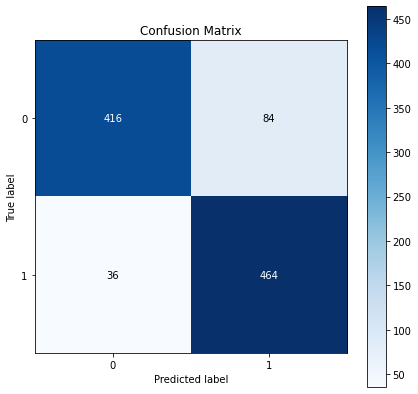

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_true, y_pred, figsize=(7,7))

In [57]:
import random
import numpy as np

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(64, 64),
        batch_size=1,
        class_mode='binary',
        shuffle=False)


Found 1000 images belonging to 2 classes.


In [ ]:
y_pred = model.predict(test_generator)
y_pred_classes = np.round(y_pred).astype(int)
y_pred_classes = y_pred_classes.ravel().tolist()

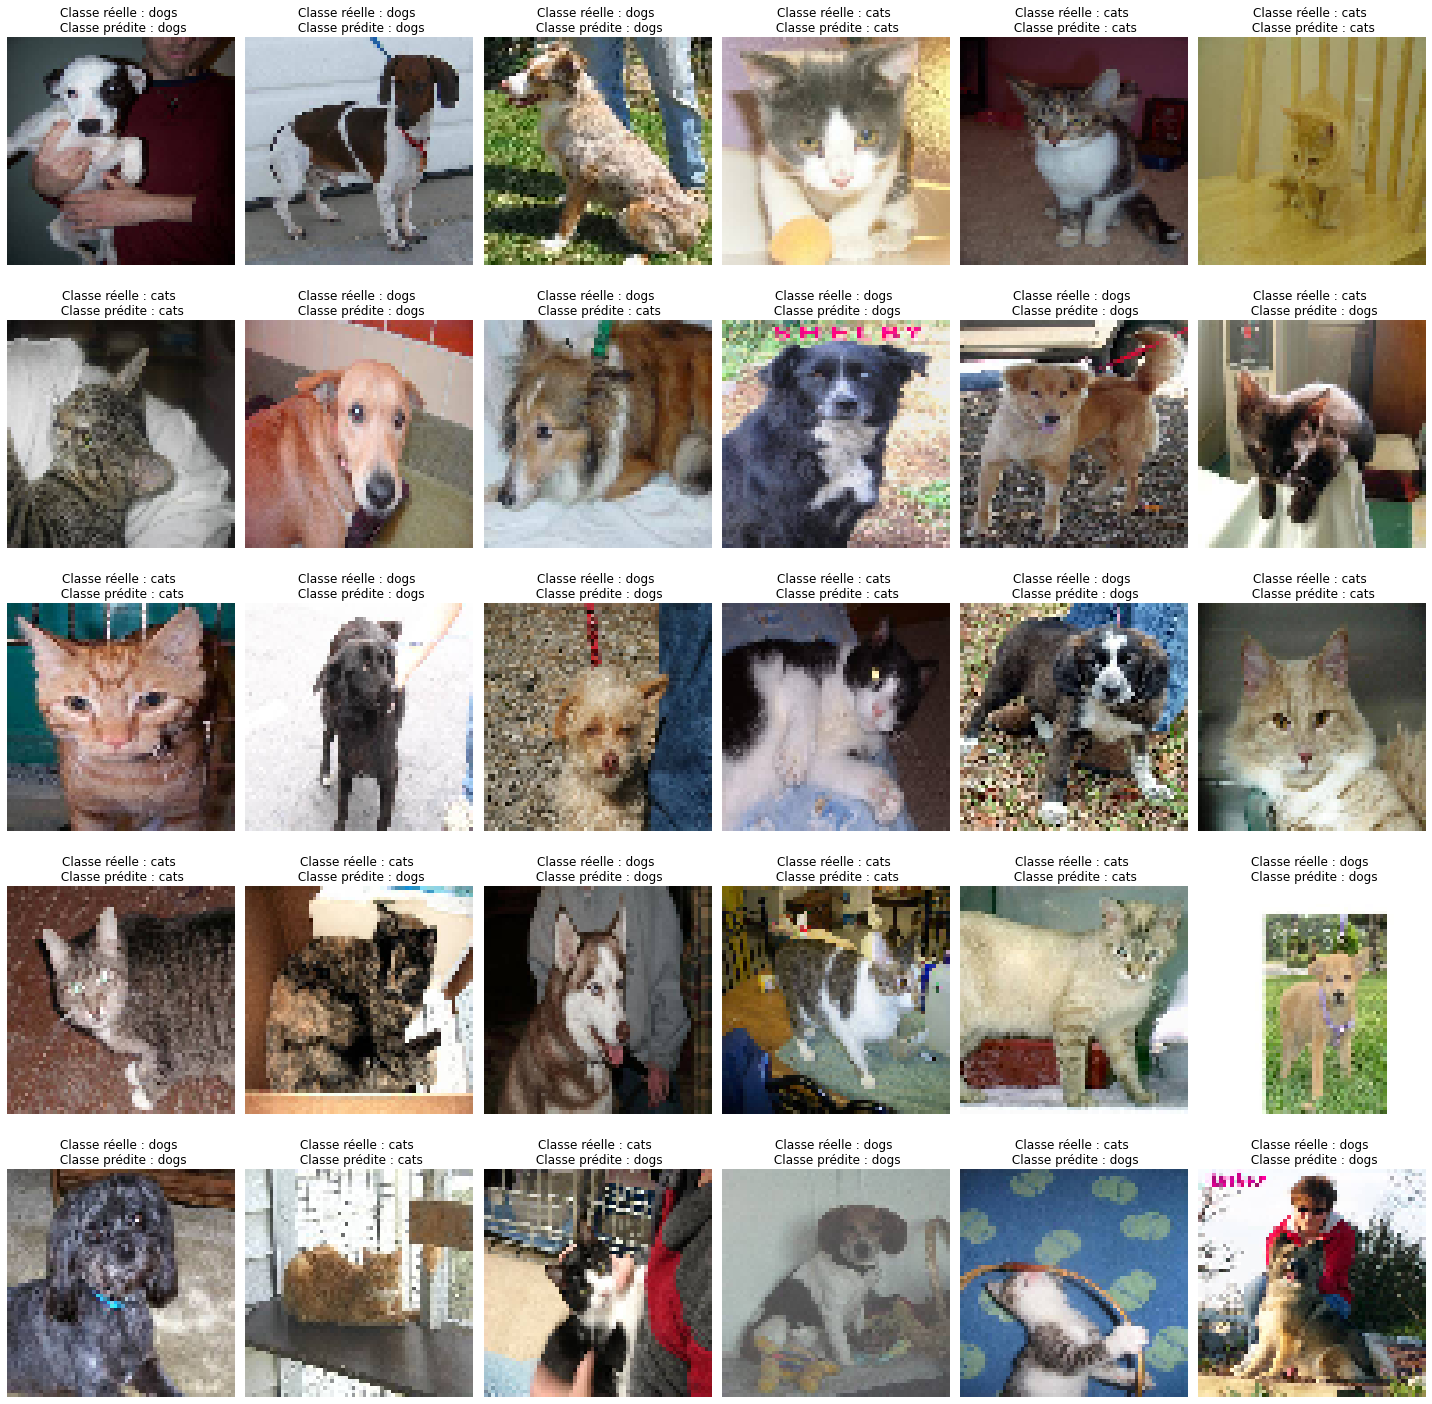

In [69]:
y_true = test_generator.classes

class_names = list(test_generator.class_indices.keys())

num_images = 30
num_cols = 6  
num_rows = num_images // num_cols + (num_images % num_cols > 0)  

random_image_indices = random.sample(range(1000), num_images)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 20))

for i in range(num_images):
    row = i // num_cols
    col = i % num_cols
    img, _ = test_generator[random_image_indices[i]]
    true_class = class_names[y_true[random_image_indices[i]]]
    pred_class = class_names[y_pred_classes[random_image_indices[i]]]
    axs[row, col].imshow(img[0])
    axs[row, col].set_title(f"Classe réelle : {true_class} \n Classe prédite : {pred_class}")
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()